In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
# Load data
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

In [3]:
# Combine train and test data for preprocessing
data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15613.000000,1.561300e+04,15613.000000,15612.000000,15612.000000,15612.000000,1.561200e+04,1.561100e+04,15611.000000,15611.000000,15611.000000
mean,3902.754628,4.061600e+17,68.659763,48974.185242,38.541164,-90.332979,9.328824e+04,1.348718e+09,38.533519,-90.331203,0.004292
std,2253.622607,1.294140e+18,118.841586,26980.057752,5.143933,14.068225,3.143461e+05,2.316076e+07,5.175693,14.088488,0.065374
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.163455,-166.550779,0.000000
25%,1951.000000,1.800365e+14,9.610000,26041.000000,34.699875,-96.809400,7.590000e+02,1.325583e+09,34.779525,-96.937485,0.000000
50%,3903.000000,3.518669e+15,47.500000,48202.000000,39.362950,-87.461600,2.501000e+03,1.325815e+09,39.359919,-87.429817,0.000000
75%,5854.000000,4.651007e+15,81.940000,72047.000000,41.940400,-80.158000,2.047800e+04,1.371908e+09,41.955727,-80.219295,0.000000
max,7814.000000,4.992346e+18,3204.980000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371993e+09,66.645176,-66.967742,1.000000


In [4]:
#shape
print(train.shape)
print(test.shape)

(7815, 23)
(7798, 23)


In [5]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  15613.000000  1.561300e+04  15613.000000  15612.000000  15612.000000   
mean    3902.754628  4.061600e+17     68.659763  48974.185242     38.541164   
std     2253.622607  1.294140e+18    118.841586  26980.057752      5.143933   
min        0.000000  6.041621e+10      1.000000   1257.000000     20.027100   
25%     1951.000000  1.800365e+14      9.610000  26041.000000     34.699875   
50%     3903.000000  3.518669e+15     47.500000  48202.000000     39.362950   
75%     5854.000000  4.651007e+15     81.940000  72047.000000     41.940400   
max     7814.000000  4.992346e+18   3204.980000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  15612.000000  1.561200e+04  1.561100e+04  15611.000000  15611.000000   
mean     -90.332979  9.328824e+04  1.348718e+09     38.533519    -90.331203   
std       14.068225  3.143461e+05  2.316076e+07    

In [6]:
# Label Encoding for categorical variables
label_encoders = {}
label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [7]:
# Date and Time feature extraction
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day

In [8]:
# Drop irrelevant columns
data.drop(['trans_date_trans_time', 'dob', 'first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [9]:
# Check for NaN values in the target variable
print(data['is_fraud'].isnull().sum())

2


In [10]:
# Drop rows with NaN values in the target variable
data = data.dropna(subset=['is_fraud'])

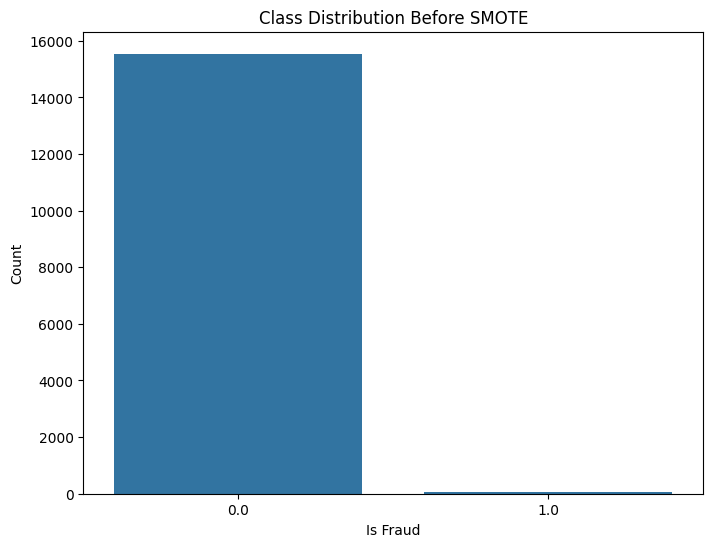

In [11]:
# Plotting the class distribution before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='is_fraud')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [12]:
# Handling imbalanced data using SMOTE
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

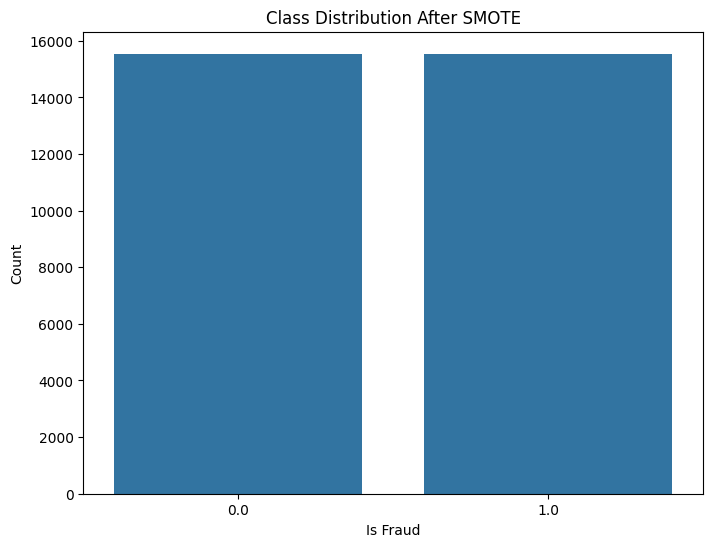

In [13]:
# Plotting the class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [15]:
# Training models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [16]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [17]:
# Evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      3137
         1.0       0.00      0.00      0.00      3081

    accuracy                           0.50      6218
   macro avg       0.25      0.50      0.34      6218
weighted avg       0.25      0.50      0.34      6218

[[3137    0]
 [3081    0]]
Accuracy: 0.5045030556449019


Model: Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3137
         1.0       1.00      1.00      1.00      3081

    accuracy                           1.00      6218
   macro avg       1.00      1.00      1.00      6218
weighted avg       1.00      1.00      1.00      6218

[[3126   11]
 [   3 3078]]
Accuracy: 0.997748472177549


Model: Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3137
         1.0       1.00      1.00      1.00      3081

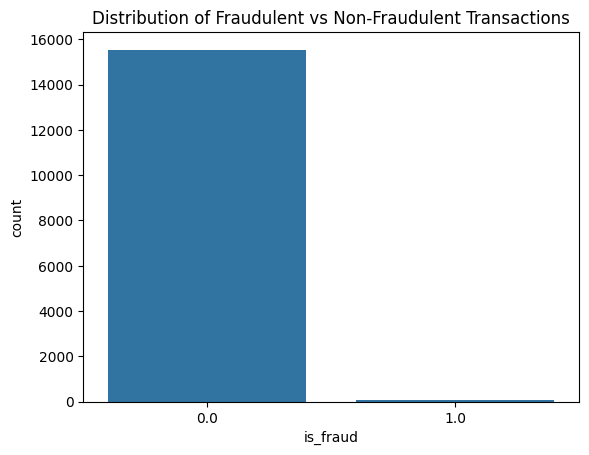

In [18]:
# Visualization
sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

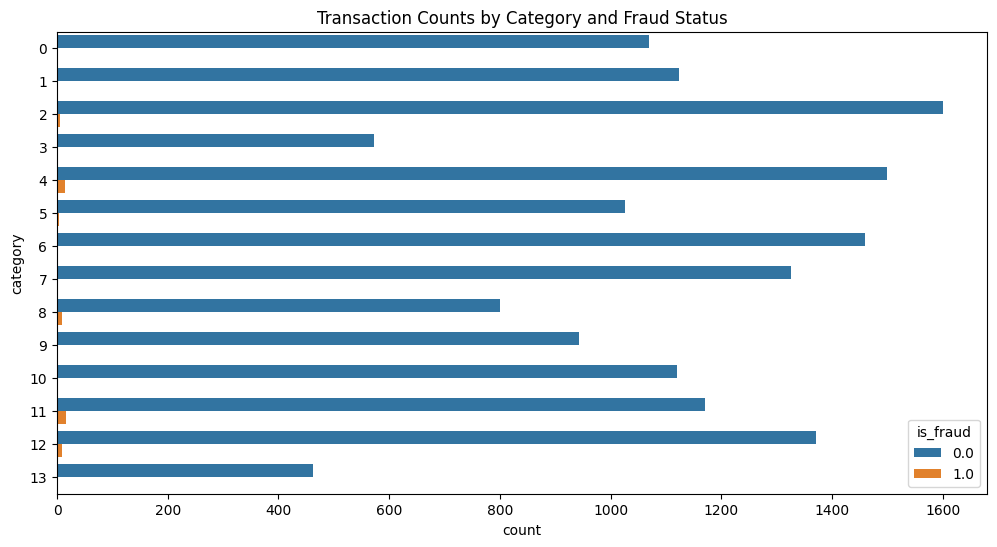

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

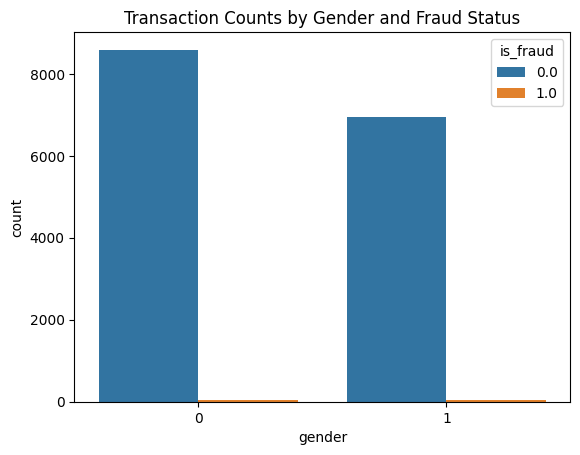

In [20]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

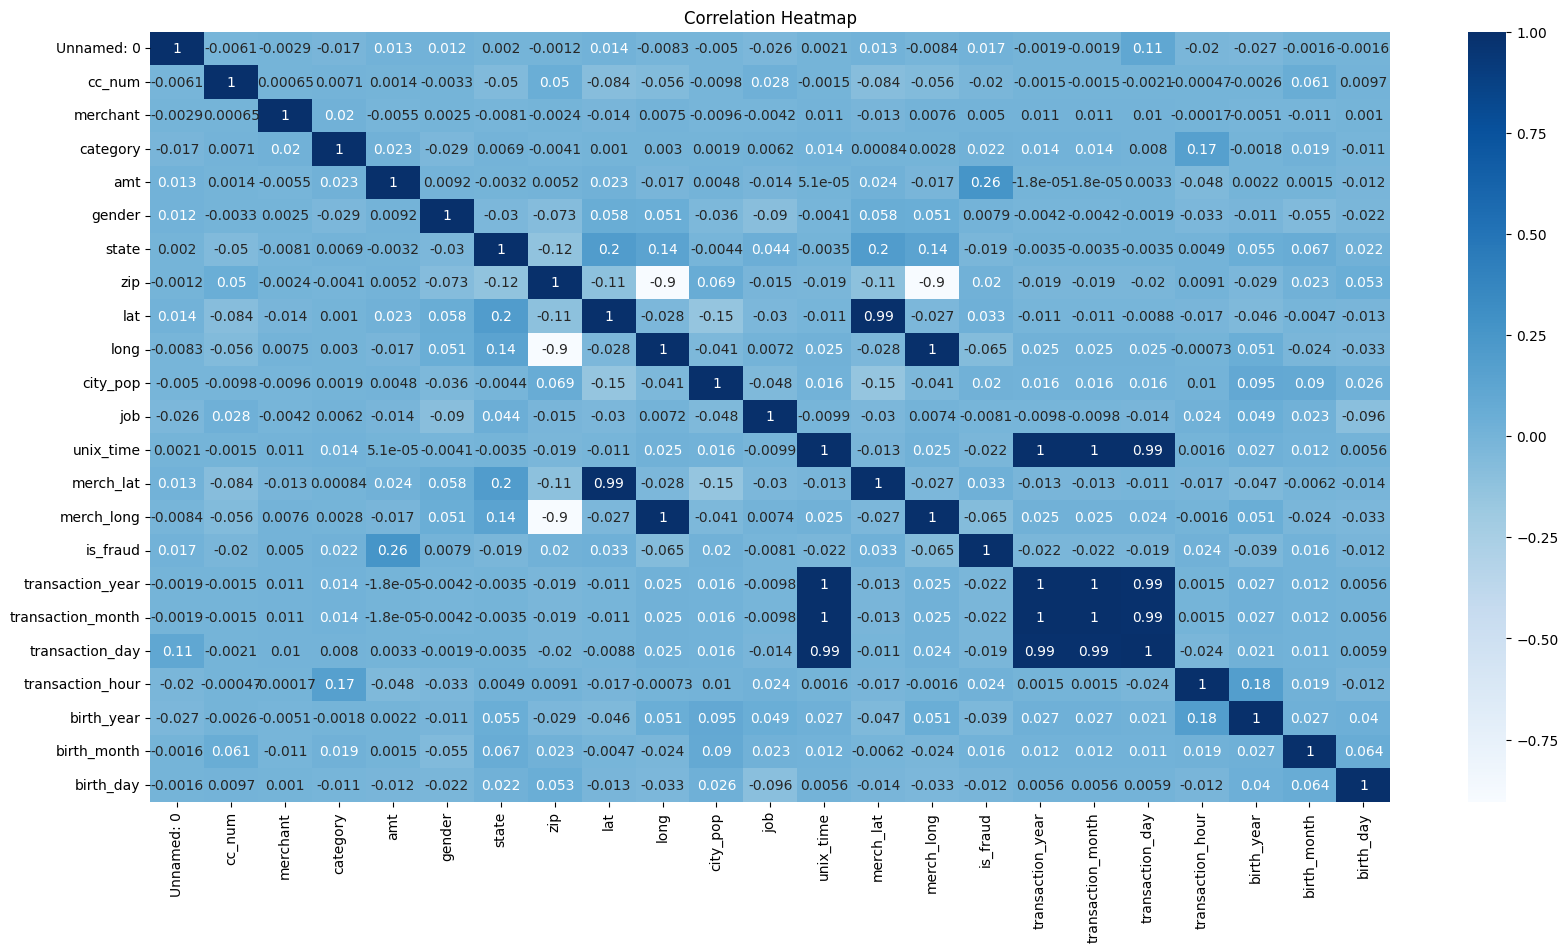

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

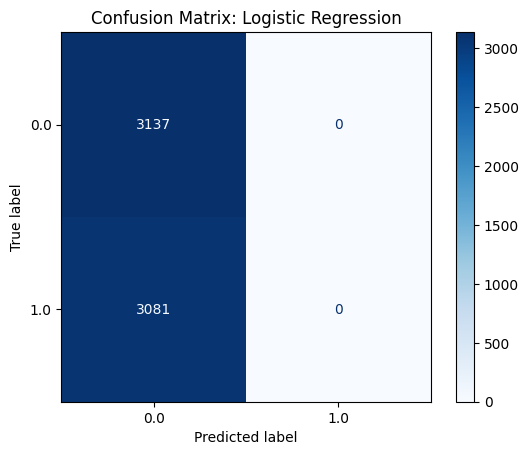

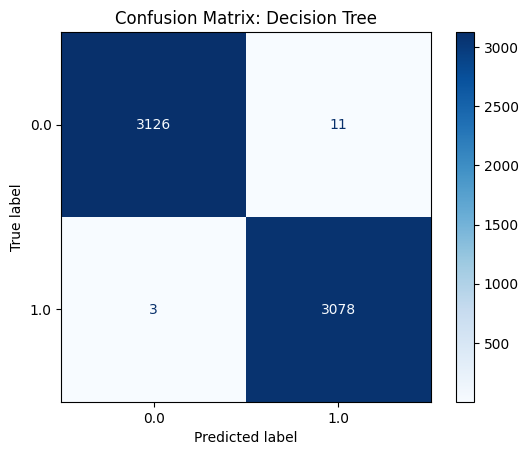

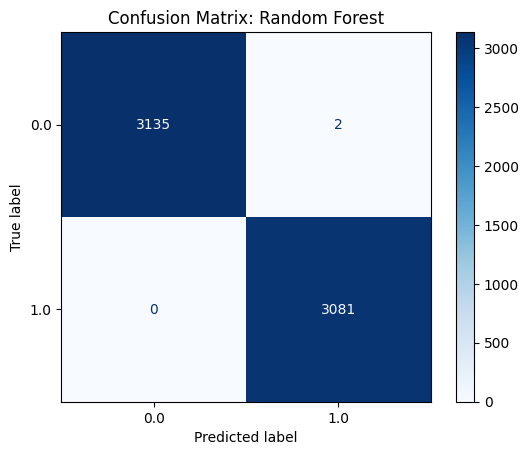

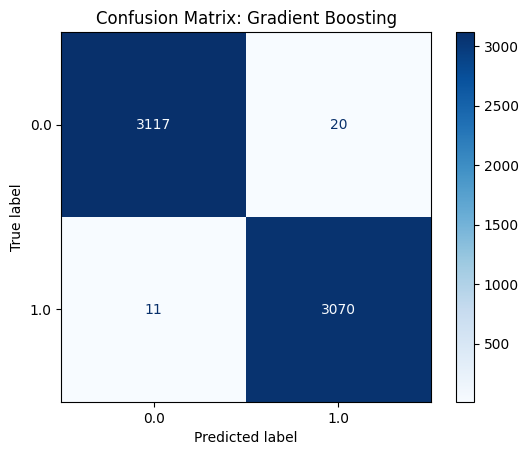

In [23]:
# Import the necessary module
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()